**About the data**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

[Source](https://github.com/zalandoresearch/fashion-mnist)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
#Read in Fashion MNIST data set
fashion_mnist = keras.datasets.fashion_mnist

#Init to training and test data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
#View shapes
print('Training data and label shapes:',X_train.shape,y_train.shape)
print('Test data and label shapes:',X_test.shape,y_test.shape)

Training data and label shapes: (60000, 28, 28) (60000,)
Test data and label shapes: (10000, 28, 28) (10000,)


**Preview Data**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

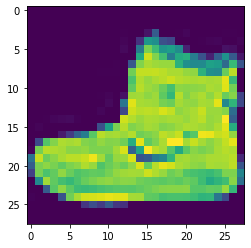

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print(X_train[0])
print(y_train[0])

In [6]:
#Normalize training and test data
X_train = X_train/255
X_test = X_test/255

In [7]:
#Define model
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation= tf.nn.relu),
                           tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
#Compile model
model.compile(optmizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [9]:
#Fit to training data
model.fit(X_train, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5032 - accuracy: 0.8199
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3773 - accuracy: 0.8648
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3444 - accuracy: 0.8781
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3297 - accuracy: 0.8832
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3201 - accuracy: 0.8878


In [10]:
#Evaluate model on test data
model.evaluate(X_test, y_test, verbose = 0)

[0.37596413805484774, 0.8773]

**Exercises**

In [11]:
#What are these outputs?
classifications = model.predict(X_test)

#This print will tell you the probabilities for each class found by the model
print(classifications[0])

#This is the actual label
print(y_test[0])

[4.1046642e-06 2.8657263e-09 2.7940890e-08 2.3735852e-07 3.5594203e-09
 2.2894964e-03 5.8798815e-07 1.5603207e-02 3.5130003e-07 9.8210192e-01]
9


In [16]:
#Rebuild the model to have 512 neurons. Whats the impact?
#Longer time to train but model is more accurate on training data,
#less so on test data. Overfitting?

#Init to training and test data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Normalize training and test data
X_train = X_train/255
X_test = X_test/255

#Build new model
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#Compile model2
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

#Fit model2 to training data
model.fit(X_train, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4753 - accuracy: 0.8299
Epoch 2/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3588 - accuracy: 0.8678
Epoch 3/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3227 - accuracy: 0.8816
Epoch 4/5
60000/60000 [==============================] - 7s 108us/sample - loss: 0.2982 - accuracy: 0.8899
Epoch 5/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2810 - accuracy: 0.8939


In [13]:
#Evaluate model on test data
model.evaluate(X_test, y_test, verbose = 0)


[0.5414138682365417, 0.8175]

In [15]:
#What are these outputs?
classifications = model.predict(X_test)
print(classifications[0])
print(y_test[0])

[1.5128881e-28 2.1601390e-27 4.7922682e-23 2.6172974e-22 1.8411797e-25
 1.6656677e-04 4.3828858e-27 7.0830889e-02 9.7762008e-17 9.2900258e-01]
9


In [17]:
#Rebuild the model to have 1024 neurons. Whats the impact?
#longer to train, better accuracy on training and test data 

#Init to training and test data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Normalize training and test data
X_train = X_train/255
X_test = X_test/255

#Build new model
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#Compile Model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#Fit to training data
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 175us/sample - loss: 0.4686 - accuracy: 0.8311
Epoch 2/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.3568 - accuracy: 0.8690
Epoch 3/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3236 - accuracy: 0.8806
Epoch 4/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2968 - accuracy: 0.8894
Epoch 5/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.2785 - accuracy: 0.8954


In [19]:
#Evaluate on test data
model.evaluate(X_test, y_test, verbose =0)

[0.35984980428218843, 0.8737]

In [20]:
classifications = model.predict(X_test)
print(classifications[0])
print(y_test[0])

[1.05828605e-07 1.16852767e-08 1.82844531e-08 1.45016301e-07
 2.36132493e-07 3.78563674e-03 7.64704623e-07 4.86831963e-02
 1.70072090e-05 9.47512865e-01]
9


**Implementing callbacks**

In [40]:
#Init callback class

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > .88):
            print('\n 88% accuracy achieved, cancelling training')
            self.model.stop_training = True

SyntaxError: invalid syntax (<ipython-input-40-743e43bb71a2>, line 8)

In [41]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.6):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.4771 - accuracy: 0.8299

TypeError: '>' not supported between instances of 'NoneType' and 'float'